<a href="https://colab.research.google.com/github/Phunbie/assignments/blob/main/mlzoomcamp_wk2_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal of this homework is to create a regression model for prediction apartment prices (column 'price').


In [1]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv'

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
df = pd.read_csv(url)
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

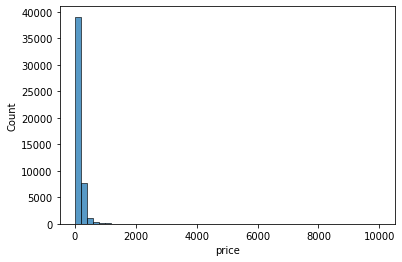

In [7]:
sns.histplot(df.price,bins= 50)

In [8]:
dataf = df[['latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
dataf

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,70,2,0,NaN,2,9
48891,40.70184,-73.93317,40,4,0,NaN,2,36
48892,40.81475,-73.94867,115,10,0,NaN,1,27
48893,40.75751,-73.99112,55,1,0,NaN,6,2


Question 1: Find a feature with missing values. How many missing values does it have?

In [9]:
dataf.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Question 2:What's the median (50% percentile) for variable 'minimum_nights'?

In [10]:
dataf.minimum_nights.describe().loc['50%']

3.0

Question 3:Which option gives better RMSE?

In [11]:
n = len(dataf)
n

48895

In [12]:
n_test = int(0.2*n)
n_test

9779

In [13]:
n_val = int(0.2*n)
n_val

9779

In [14]:
n_train = n - (n_test+n_val)
n_train

29337

In [15]:
idx = np.arange(n)

In [16]:
np.random.seed(42)
np.random.shuffle(idx)

In [17]:
idx[:20]

array([  879, 44383, 15394, 43230, 16332,  5966, 29838, 41764, 11118,
       31800, 44211, 31732,  5990, 13153, 24650, 19825, 45050, 24017,
       32814,  3290])

In [18]:
train_df = dataf.iloc[idx[:n_train]]

In [19]:
val_df = dataf.iloc[idx[n_train:n_train+n_val]]

In [20]:
test_df = dataf.iloc[idx[n_train+n_val:]]

In [21]:
len(train_df),len(val_df),len(test_df)

(29337, 9779, 9779)

In [22]:
y_train = np.log1p(train_df.price.values) 
y_val = np.log1p(val_df.price.values)
y_test = np.log1p(test_df.price.values)

In [23]:
del train_df['price']
del val_df['price']
del test_df['price']

In [24]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [25]:
me = train_df.reviews_per_month.mean()

In [26]:
train_m = train_df.fillna(me).values
val_m = val_df.fillna(me).values
test_m = test_df.fillna(me).values

In [27]:
train_zero = train_df.fillna(0).values
val_zero = val_df.fillna(0).values
test_zero = test_df.fillna(0).values

In [28]:
w_0_mean, w_mean  =train_linear_regression(train_m,y_train )
w_0_mean, w_mean

(-423.5393076139524,
 array([ 1.31148321e+00, -5.06799071e+00, -4.87741552e-04, -6.63849280e-04,
         5.34563271e-03,  1.32706020e-03,  6.38794182e-04]))

In [29]:
w_0_zero, w_zero = train_linear_regression(train_zero,y_train )
w_0_zero, w_zero

(-419.91265807142094,
 array([ 1.30676225e+00, -5.02167854e+00, -5.59803109e-04, -4.07634896e-04,
        -8.25470069e-03,  1.33371320e-03,  6.50203890e-04]))

In [30]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [31]:
y_pred_mean = w_0_mean + val_m.dot(w_mean)

In [32]:
y_pred_zero = w_0_zero + val_zero.dot(w_zero)

In [33]:
RMSE_mean = round(rmse(y_val,y_pred_mean),2)
RMSE_zero = round(rmse(y_val,y_pred_zero),2)
RMSE_mean,RMSE_zero

(0.64, 0.64)

Question 4:Which r gives the best RMSE?

In [34]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [35]:
def rmser(X,y,r,X2,Y2):
  w_0,w =train_linear_regression_reg(X, y, r)
  y_pred = w_0 + X2.dot(w)
  rsme = rmse(Y2,y_pred)
  return 'rmse: ',rsme, 'r: ',r

In [36]:
r = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

In [37]:
for i in r:
  print(rmser(train_zero,y_train,i,val_zero,y_val))

('rmse: ', 0.6430337788584176, 'r: ', 0)
('rmse: ', 0.6430341157479255, 'r: ', 1e-06)
('rmse: ', 0.6430723153561932, 'r: ', 0.0001)
('rmse: ', 0.6437669735361422, 'r: ', 0.001)
('rmse: ', 0.655752842747922, 'r: ', 0.01)
('rmse: ', 0.6773299642454972, 'r: ', 0.1)
('rmse: ', 0.6823116950156266, 'r: ', 1)
('rmse: ', 0.6827915727849295, 'r: ', 5)
('rmse: ', 0.6828430212097022, 'r: ', 10)


Question 5:What's the standard deviation of all the scores? 

In [38]:
def rmsem(X,y,X2,Y2):
  w_0,w = train_linear_regression(X, y)
  y_pred = w_0 + X2.dot(w)
  rsme = rmse(Y2,y_pred)
  return rsme

In [39]:
random_seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [40]:
rmse_std = []


In [41]:
for i in random_seeds:
  np.random.seed(i)
  np.random.shuffle(idx)
  train_df = dataf.iloc[idx[:n_train]]
  val_df = dataf.iloc[idx[n_train:n_train+n_val]]
  test_df = dataf.iloc[idx[n_train+n_val:]]
  y_train = np.log1p(train_df.price.values) 
  y_val = np.log1p(val_df.price.values)
  y_test = np.log1p(test_df.price.values)
  del train_df['price']
  del val_df['price']
  del test_df['price']
  train_zero = train_df.fillna(0).values
  val_zero = val_df.fillna(0).values
  test_zero = test_df.fillna(0).values
  rmse_std.append(rmsem(train_zero,y_train,val_df,y_val))

In [42]:
rmse_std

[0.6206514160493326,
 0.6153712354201277,
 0.6148513567107398,
 0.6150639144756425,
 0.6120867548120438,
 0.6269967134482993,
 0.6183502800783541,
 0.6194091133235126,
 0.6240723087666911,
 0.6283312573233728]

In [43]:
round(np.std(rmse_std),3)

0.005

Question 6:

In [47]:
np.random.seed(9)
np.random.shuffle(idx)
train_df = dataf.iloc[idx[:n_train+n_val]]
test_df = dataf.iloc[idx[n_train+n_val:]]

len(train_df),len(test_df)

(39116, 9779)

In [48]:
y_train = np.log1p(train_df.price.values) 
y_test = np.log1p(test_df.price.values)

In [49]:
y_train = np.log1p(train_df.price.values) 
y_test = np.log1p(test_df.price.values)

In [50]:
del train_df['price']
del test_df['price']

In [51]:
train_zero = train_df.fillna(0).values
test_zero = test_df.fillna(0).values

In [52]:
rmser(train_zero,y_train,0.001,test_zero,y_test)

('rmse: ', 0.6379835332126885, 'r: ', 0.001)